In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Null Hypothesis (H₀)**:
There is no significant difference between the total goals scored in men's and women's soccer tournaments.

**Alternative Hypothesis (H₁)**:
There is a significant difference between the total goals scored in men's and women's soccer tournaments.

This hypothesis is tested for each tournament (e.g., World Cup, Euros) using either the appropriate t-test (for normally distributed data) or the Mann-Whitney U test (for non-normally distributed data).

**Interpretation**:
If we reject the null hypothesis, it means that there is a statistically significant difference in the goals scored between men's and women's soccer for that tournament.
If we fail to reject the null hypothesis, it means that there is no statistically significant difference in the goals scored between men's and women's soccer for that tournament.
The visualizations and tests help us determine whether we should reject or fail to reject the null hypothesis for each specific tournament.

In [ ]:
# Load the datasets
men_soccer = pd.read_csv('/content/drive/MyDrive/analytics_day/soccer_hypothesis/men_results.csv')
women_soccer = pd.read_csv('/content/drive/MyDrive/analytics_day/soccer_hypothesis/women_results.csv')

print(men_soccer.head())
print(f"-----------------------------------------------------------------------------------------------")
print(women_soccer.head())

print(men_soccer.shape)
print(women_soccer.shape)

print(len(set(men_soccer.tournament)))
print(len(set(women_soccer.tournament)))



   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  
0   Friendly  
1   Friendly  
2   Friendly  
3   Friendly  
4   Friendly  
-----------------------------------------------------------------------------------------------
   Unnamed: 0        date home_team  away_team  home_score  away_score  \
0           0  1969-11-01     Italy     France           1           0   
1           1  1969-11-01   Denmark    England           4           3   
2           2  1969-11-02   England     France           2           0   
3           3  1969-11-02     Italy    Denmark           3           1   
4    

In [ ]:
#Create new column for total goals
men_soccer['total_goals'] = men_soccer['home_score'] + men_soccer['away_score']
women_soccer['total_goals'] = women_soccer['home_score'] + women_soccer['away_score']

print(men_soccer.head())
print(f"-----------------------------------------------------------------------------------------------")
print(women_soccer.head())

   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  total_goals  
0   Friendly            0  
1   Friendly            6  
2   Friendly            3  
3   Friendly            4  
4   Friendly            3  
-----------------------------------------------------------------------------------------------
   Unnamed: 0        date home_team  away_team  home_score  away_score  \
0           0  1969-11-01     Italy     France           1           0   
1           1  1969-11-01   Denmark    England           4           3   
2           2  1969-11-02   England     France           2           0   
3

In [ ]:
set(men_soccer['tournament'])

# VISUALS

In [ ]:
# Filtering data for World Cup and Euros tournaments
wc_men = men_soccer[men_soccer['tournament'] == 'FIFA World Cup']
euros_men = men_soccer[men_soccer['tournament'] == 'UEFA Euro']
copa_men = men_soccer[men_soccer['tournament'] == 'Copa América']
euro_qual_men = men_soccer[men_soccer['tournament'] == 'UEFA Euro qualification']
asia_men = men_soccer[men_soccer['tournament'] == 'AFC Asian Cup']

wc_women = women_soccer[women_soccer['tournament'] == 'FIFA World Cup']
euros_women = women_soccer[women_soccer['tournament'] == 'UEFA Euro']
copa_women = women_soccer[women_soccer['tournament'] == 'Copa América']
euro_qual_women = women_soccer[women_soccer['tournament'] == 'UEFA Euro qualification']
asia_women = women_soccer[women_soccer['tournament'] == 'AFC Asian Cup']

# Combining men and women data for easier analysis
def add_gender_and_tournament(df, gender):
    df['gender'] = gender
    return df

# Adding gender and concatenating data
wc_men = add_gender_and_tournament(wc_men, 'Men')
euros_men = add_gender_and_tournament(euros_men, 'Men')
copa_men = add_gender_and_tournament(copa_men, 'Men')
euro_qual_men = add_gender_and_tournament(euro_qual_men, 'Men')
asia_men = add_gender_and_tournament(asia_men, 'Men')

wc_women = add_gender_and_tournament(wc_women, 'Women')
euros_women = add_gender_and_tournament(euros_women, 'Women')
copa_women = add_gender_and_tournament(copa_women, 'Women')
euro_qual_women = add_gender_and_tournament(euro_qual_women, 'Women')
asia_women = add_gender_and_tournament(asia_women, 'Women')

# CHECKING FOR MISSING VALUES
# Define the dictionary with DataFrames
tournaments = {
    "wc_men": wc_men, "euros_men": euros_men, "copa_men": copa_men, "euro_qual_men": euro_qual_men, "asia_men": asia_men,
    "wc_women": wc_women, "euros_women": euros_women, "copa_women": copa_women, "euro_qual_women": euro_qual_women, "asia_women": asia_women
}

def null_values(df):
    return df.isnull().sum().sum()
# Iterate over the dictionary and check for null values
for tournament_name, tournament in tournaments.items():
    missing_values = null_values(tournament)
    if missing_values > 0:
        print(f"{tournament_name} has {missing_values} missing values")
    else:
        print(f"{tournament_name} has no missing values")    # There are no missing values


# CHECKING TO SEE IF THE TOTAL GOALS ARE NORMALLY DISTRIBUTED
def check_normality(df, column, title):
  plt.figure(figsize=(10, 6))
  sns.kdeplot(df[column], shade=True)
  plt.title(f'KDE Plot of Total Goals for {tournament_name}')
  plt.xlabel('Total Goals')
  plt.ylabel('Density')
  plt.show()
for tournament_name, tournament in tournaments.items():
  check_normality(tournament, 'total_goals', tournament_name)



# SOLVING AND TESTS

Men's wc_men Shapiro-Wilk Test: Statistic = 0.924, p-value = 0.000
Women's wc_women Shapiro-Wilk Test: Statistic = 0.900, p-value = 0.000


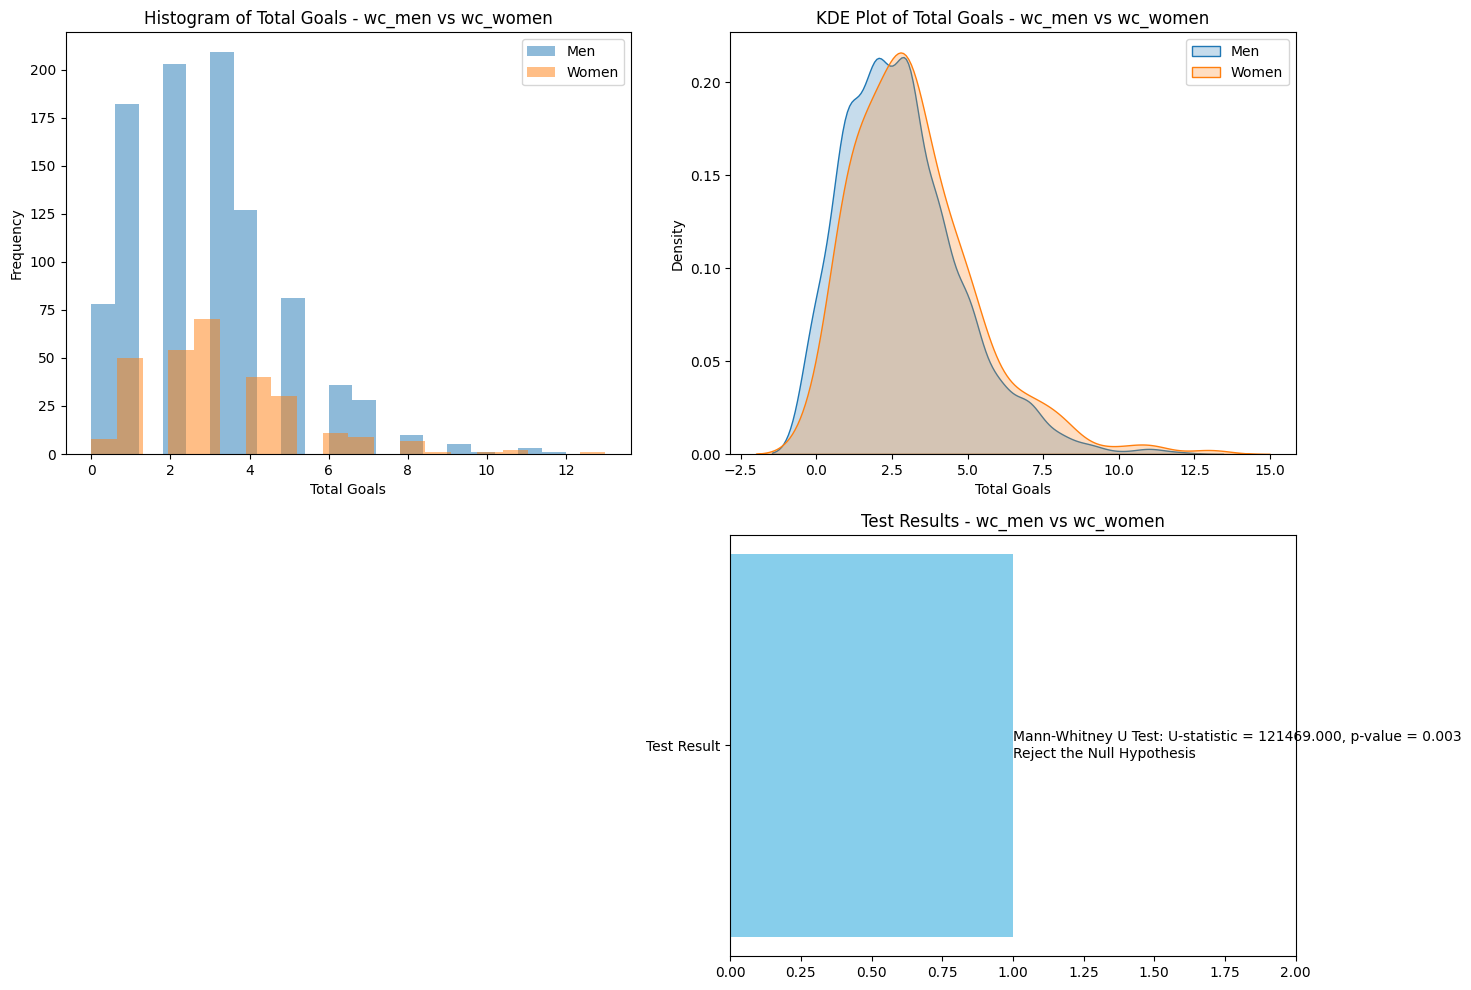

Men's euros_men Shapiro-Wilk Test: Statistic = 0.929, p-value = 0.000
Women's euros_women Shapiro-Wilk Test: Statistic = 0.928, p-value = 0.000


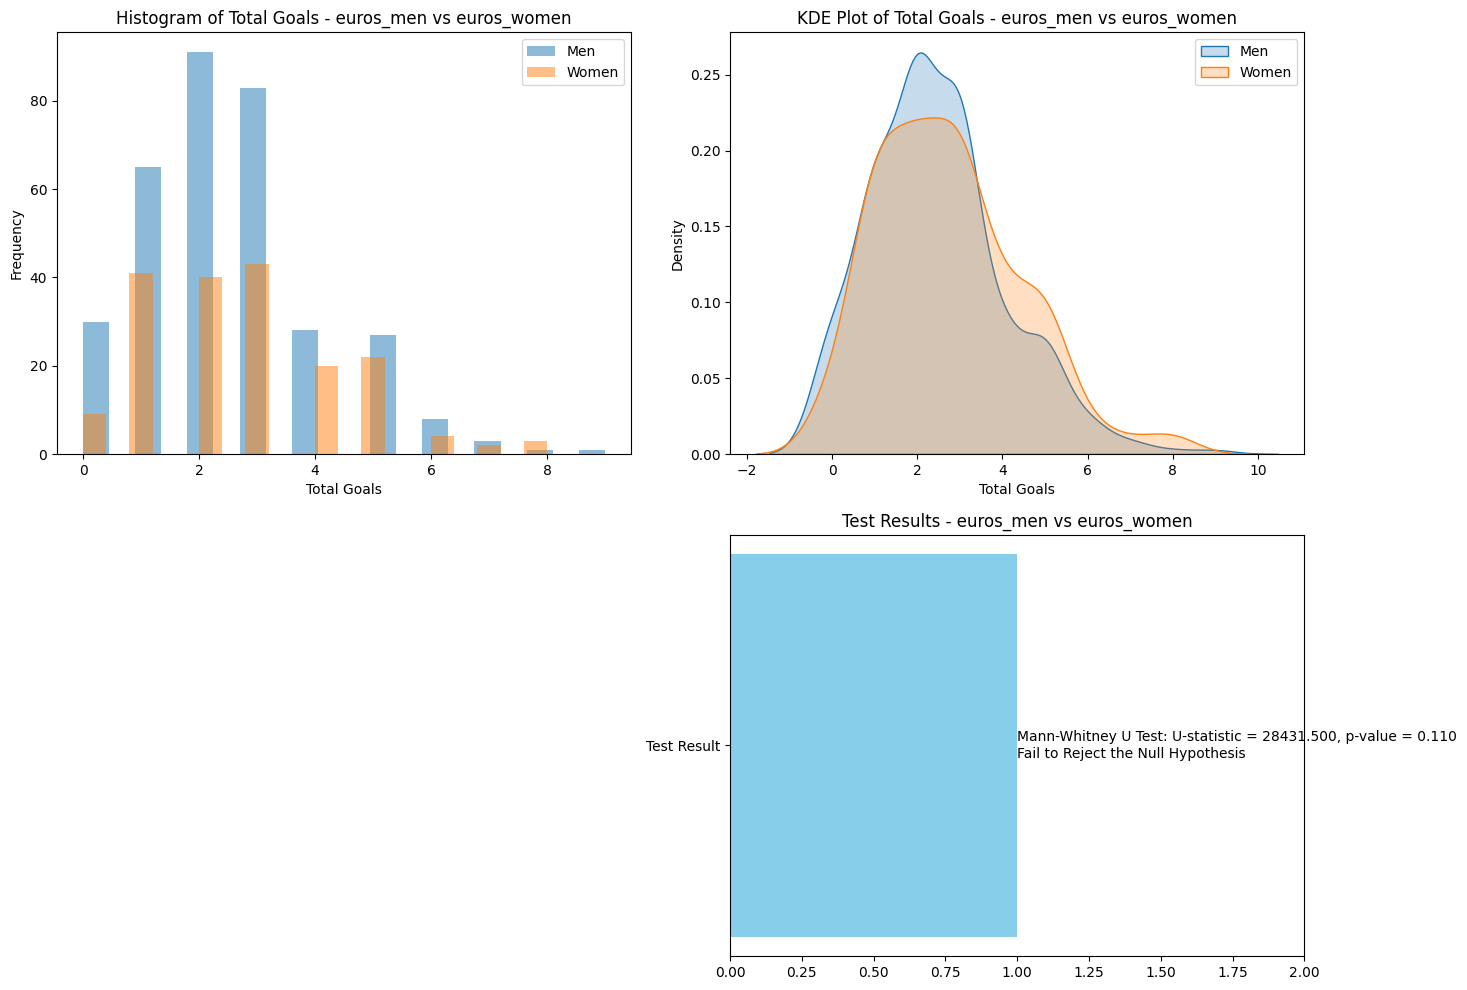

Men's copa_men Shapiro-Wilk Test: Statistic = 0.939, p-value = 0.000
Women's copa_women Shapiro-Wilk Test: Statistic = 0.871, p-value = 0.000


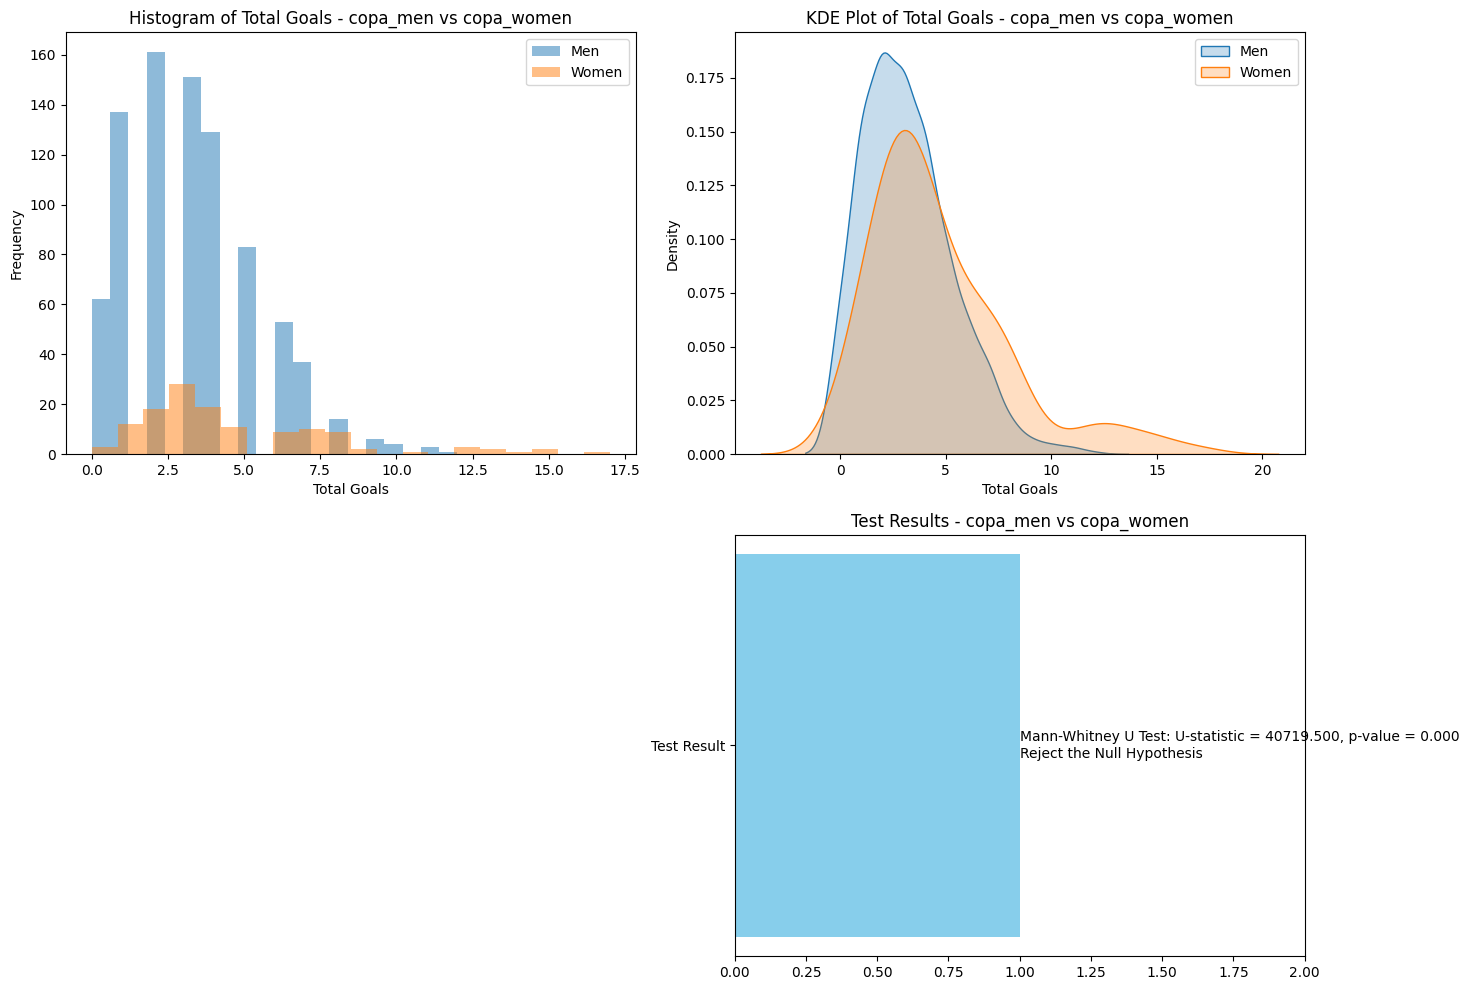

Men's euro_qual_men Shapiro-Wilk Test: Statistic = 0.933, p-value = 0.000
Women's euro_qual_women Shapiro-Wilk Test: Statistic = 0.913, p-value = 0.000


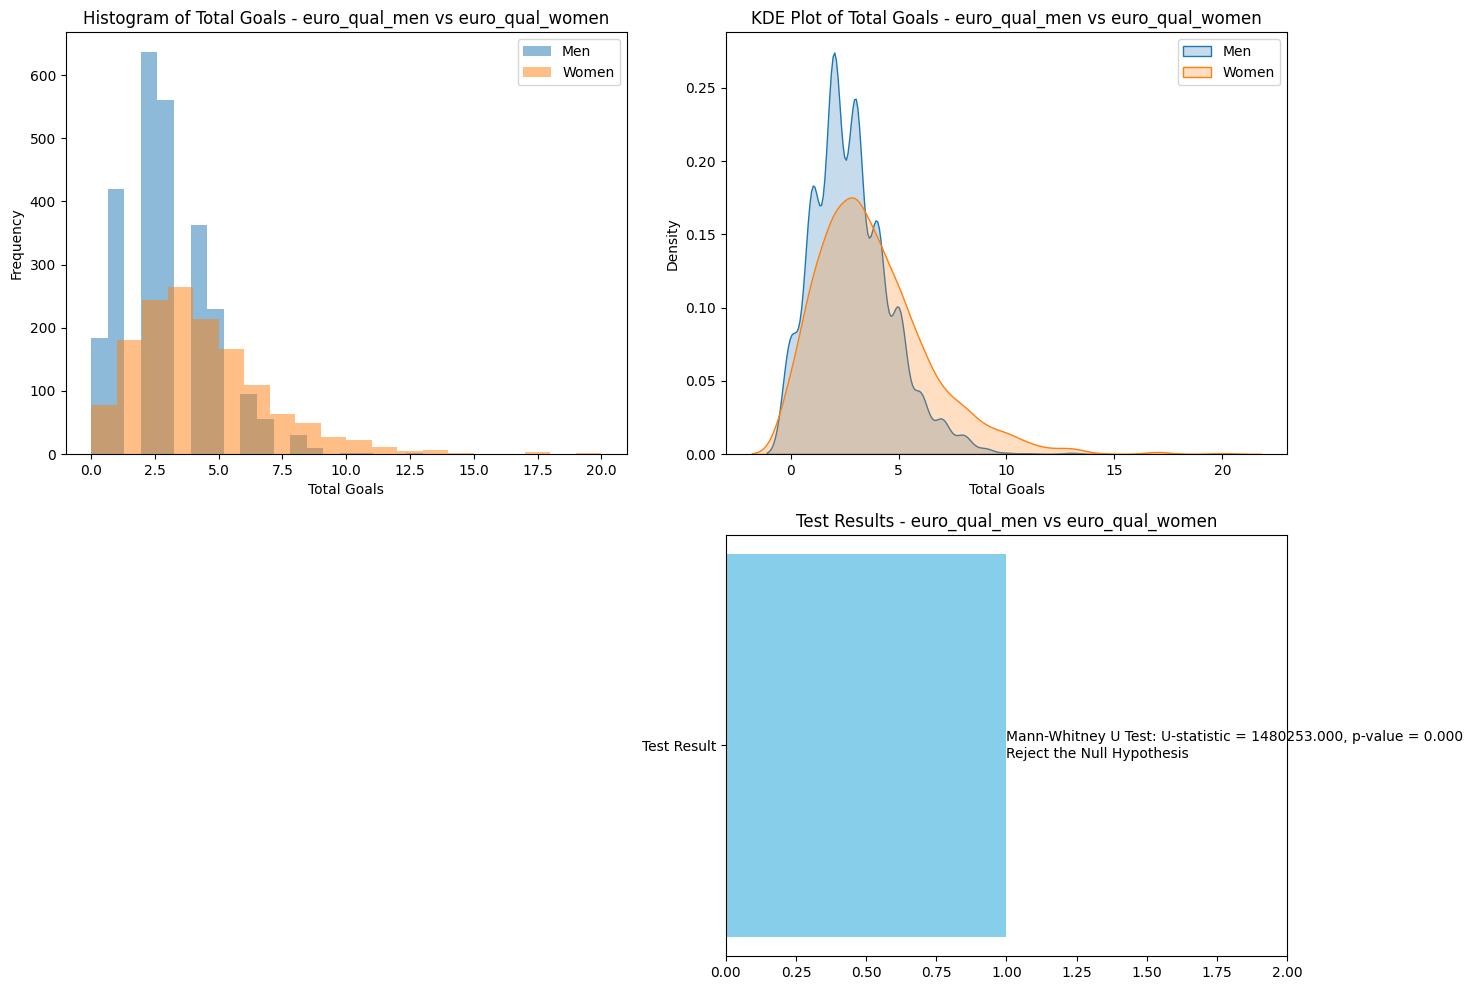

Men's asia_men Shapiro-Wilk Test: Statistic = 0.936, p-value = 0.000
Women's asia_women Shapiro-Wilk Test: Statistic = 0.826, p-value = 0.000


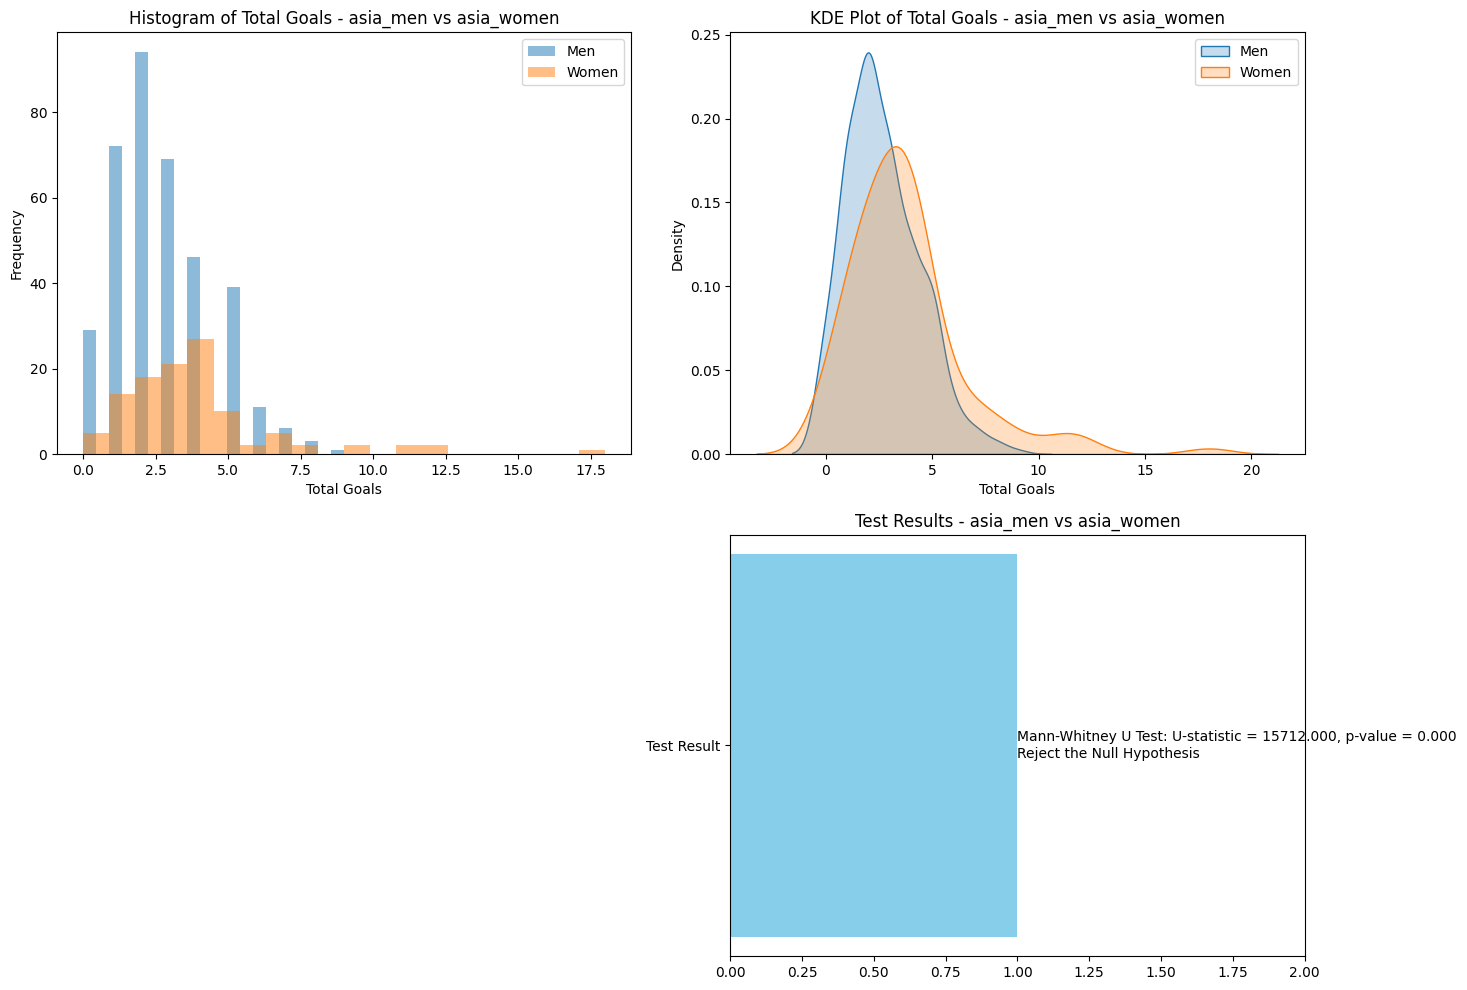


wc_men vs wc_women Results:
Mann-Whitney U Test: U-statistic = 121469.000, p-value = 0.003
Statistical Significance: Reject the Null Hypothesis

euros_men vs euros_women Results:
Mann-Whitney U Test: U-statistic = 28431.500, p-value = 0.110
Statistical Significance: Fail to Reject the Null Hypothesis

copa_men vs copa_women Results:
Mann-Whitney U Test: U-statistic = 40719.500, p-value = 0.000
Statistical Significance: Reject the Null Hypothesis

euro_qual_men vs euro_qual_women Results:
Mann-Whitney U Test: U-statistic = 1480253.000, p-value = 0.000
Statistical Significance: Reject the Null Hypothesis

asia_men vs asia_women Results:
Mann-Whitney U Test: U-statistic = 15712.000, p-value = 0.000
Statistical Significance: Reject the Null Hypothesis


In [ ]:
# Shapiro-Wilk Test
def shapiro_test(df, column):
    data = df[column].dropna()
    stat, p_value = stats.shapiro(data)
    return stat, p_value

# Mann-Whitney U Test
def mann_whitney_u_test(data1, data2):
    u_stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    return u_stat, p_value

# T-Test
def t_test(data1, data2):
    t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)
    return t_stat, p_value

# Significance level
alpha = 0.05

# Analysis
tournament_pairs = [
    ("wc_men", "wc_women"),
    ("euros_men", "euros_women"),
    ("copa_men", "copa_women"),
    ("euro_qual_men", "euro_qual_women"),
    ("asia_men", "asia_women")
]

results = {}

for men_key, women_key in tournament_pairs:
    # Get data from dictionary
    men_data = tournaments[men_key]
    women_data = tournaments[women_key]

    # Shapiro-Wilk test for men's tournament
    stat_men, p_value_men = shapiro_test(men_data, 'total_goals')
    print(f"Men's {men_key} Shapiro-Wilk Test: Statistic = {stat_men:.3f}, p-value = {p_value_men:.3f}")

    # Shapiro-Wilk test for women's tournament
    stat_women, p_value_women = shapiro_test(women_data, 'total_goals')
    print(f"Women's {women_key} Shapiro-Wilk Test: Statistic = {stat_women:.3f}, p-value = {p_value_women:.3f}")

    # Determine test to perform
    if p_value_men < alpha and p_value_women < alpha:
        # Both are not normal
        u_stat, p_value = mann_whitney_u_test(men_data['total_goals'], women_data['total_goals'])
        results[(men_key, women_key)] = (f"Mann-Whitney U Test: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}", p_value < alpha)
    elif p_value_men < alpha:
        # Men's data is not normal, perform Mann-Whitney U test
        u_stat, p_value = mann_whitney_u_test(men_data['total_goals'], women_data['total_goals'])
        results[(men_key, women_key)] = (f"Mann-Whitney U Test: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}", p_value < alpha)
    elif p_value_women < alpha:
        # Women's data is not normal, perform Mann-Whitney U test
        u_stat, p_value = mann_whitney_u_test(men_data['total_goals'], women_data['total_goals'])
        results[(men_key, women_key)] = (f"Mann-Whitney U Test: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}", p_value < alpha)
    else:
        # Both are normal, perform T-Test
        t_stat, p_value = t_test(men_data['total_goals'], women_data['total_goals'])
        results[(men_key, women_key)] = (f"T-Test: T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}", p_value < alpha)

    # Visualizations
    plt.figure(figsize=(15, 10))

    # Histogram
    plt.subplot(2, 2, 1)
    plt.hist(men_data['total_goals'], bins=20, alpha=0.5, label='Men')
    plt.hist(women_data['total_goals'], bins=20, alpha=0.5, label='Women')
    plt.title(f'Histogram of Total Goals - {men_key} vs {women_key}')
    plt.xlabel('Total Goals')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig(f"Hist-{men_key} vs {women_key}.png")

    # KDE Plot
    plt.subplot(2, 2, 2)
    sns.kdeplot(men_data['total_goals'], label='Men', fill=True)
    sns.kdeplot(women_data['total_goals'], label='Women', fill=True)
    plt.title(f'KDE Plot of Total Goals - {men_key} vs {women_key}')
    plt.xlabel('Total Goals')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f"KDE-{men_key} vs {women_key}.png")

    # Bar Chart of Test Results
    plt.subplot(2, 2, 4)
    result_text, is_significant = results[(men_key, women_key)]
    significance_status = "Reject the Null Hypothesis" if is_significant else "Fail to Reject the Null Hypothesis"

    plt.barh(['Test Result'], [1], color='skyblue')
    plt.text(1, 0, f"{result_text}\n{significance_status}", va='center', ha='left', fontsize=10)
    plt.title(f'Test Results - {men_key} vs {women_key}')
    plt.xlim(0, 2)
    plt.gca().invert_yaxis()
    plt.savefig(f"Bar-{men_key} vs {women_key}.png")

    plt.tight_layout()
    plt.show()


# Print results
for (men_key, women_key), (result, is_significant) in results.items():
    significance_status = "Reject the Null Hypothesis" if is_significant else "Fail to Reject the Null Hypothesis"
    print(f"\n{men_key} vs {women_key} Results:")
    print(result)
    print(f"Statistical Significance: {significance_status}")



In [ ]:
results

{('wc_men',
  'wc_women'): ('Mann-Whitney U Test: U-statistic = 121469.000, p-value = 0.003', True),
 ('euros_men',
  'euros_women'): ('Mann-Whitney U Test: U-statistic = 28431.500, p-value = 0.110', False),
 ('copa_men',
  'copa_women'): ('Mann-Whitney U Test: U-statistic = 40719.500, p-value = 0.000', True),
 ('afcon_men',
  'afcon_women'): ('Mann-Whitney U Test: U-statistic = 4787.000, p-value = 0.179', False),
 ('asia_men',
  'asia_women'): ('Mann-Whitney U Test: U-statistic = 15712.000, p-value = 0.000', True)}

# LINEPLOT OF AVERAGE GOALS

<ipython-input-9-afffa4da1950>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_data['date'] = pd.to_datetime(men_data['date'])
<ipython-input-9-afffa4da1950>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data['date'] = pd.to_datetime(women_data['date'])
<ipython-input-9-afffa4da1950>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

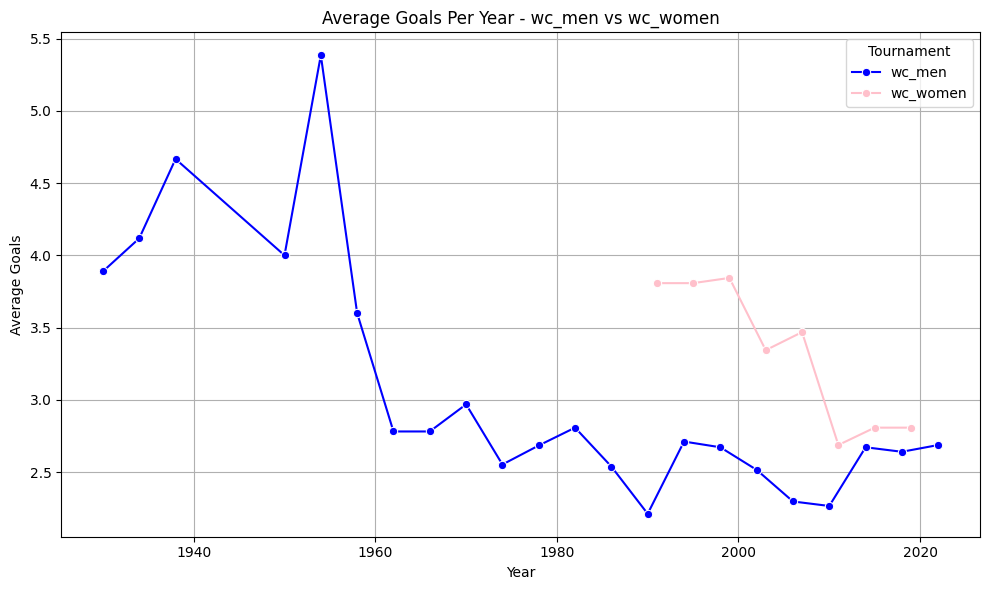

<ipython-input-9-afffa4da1950>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_data['date'] = pd.to_datetime(men_data['date'])
<ipython-input-9-afffa4da1950>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data['date'] = pd.to_datetime(women_data['date'])
<ipython-input-9-afffa4da1950>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

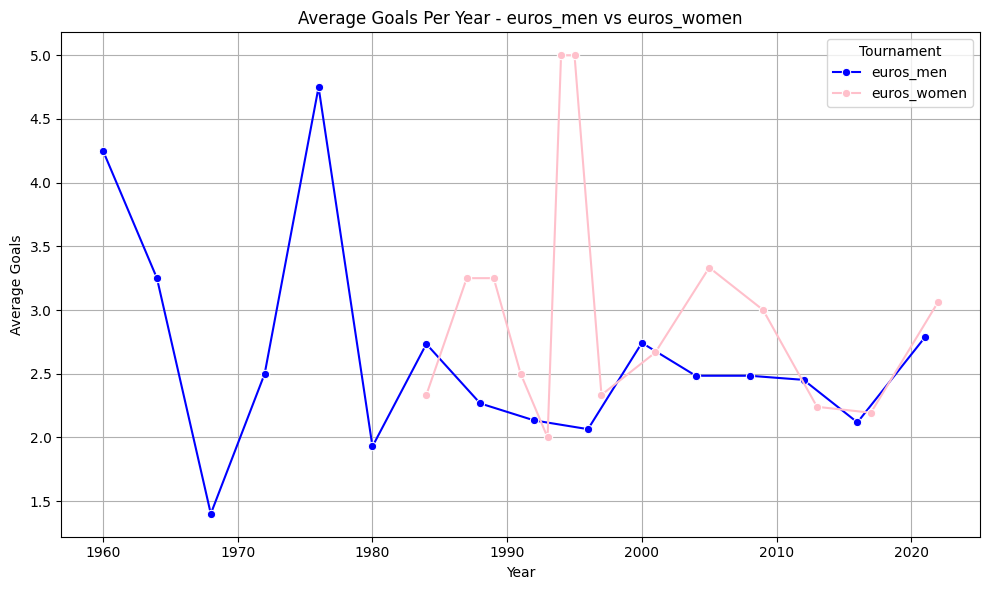

<ipython-input-9-afffa4da1950>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_data['date'] = pd.to_datetime(men_data['date'])
<ipython-input-9-afffa4da1950>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data['date'] = pd.to_datetime(women_data['date'])
<ipython-input-9-afffa4da1950>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

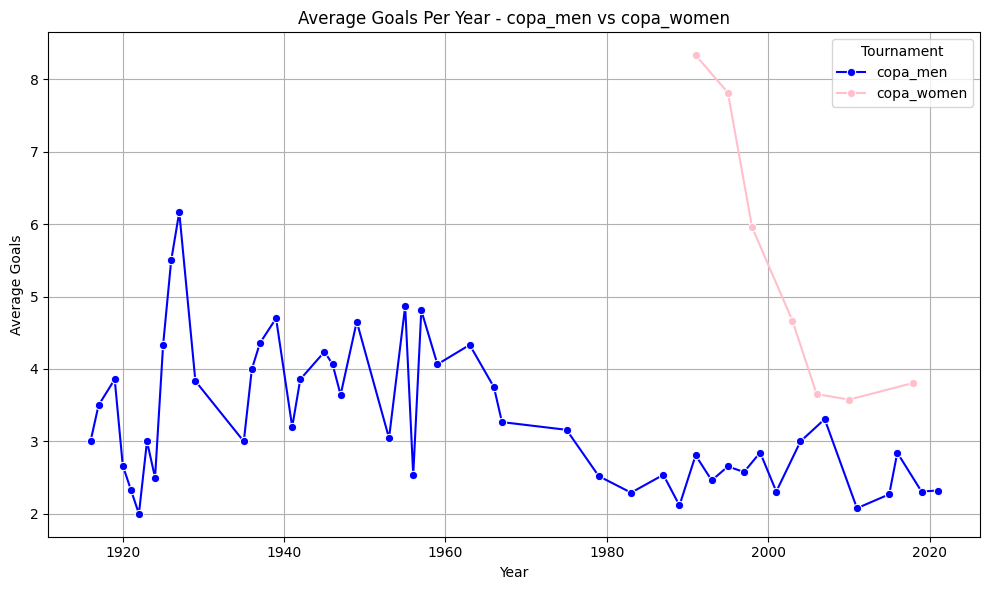

<ipython-input-9-afffa4da1950>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_data['date'] = pd.to_datetime(men_data['date'])
<ipython-input-9-afffa4da1950>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data['date'] = pd.to_datetime(women_data['date'])
<ipython-input-9-afffa4da1950>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

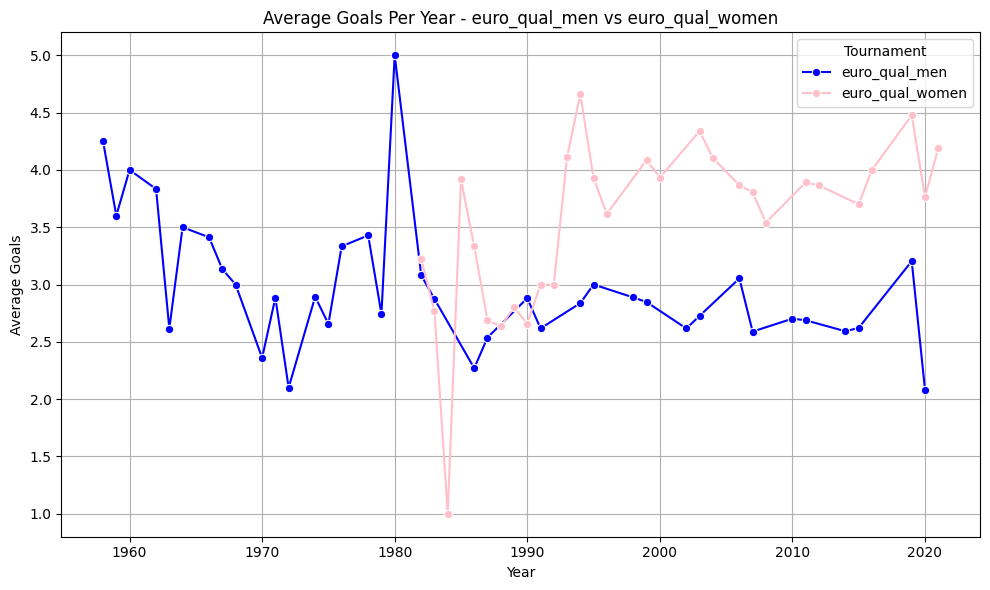

<ipython-input-9-afffa4da1950>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_data['date'] = pd.to_datetime(men_data['date'])
<ipython-input-9-afffa4da1950>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_data['date'] = pd.to_datetime(women_data['date'])
<ipython-input-9-afffa4da1950>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

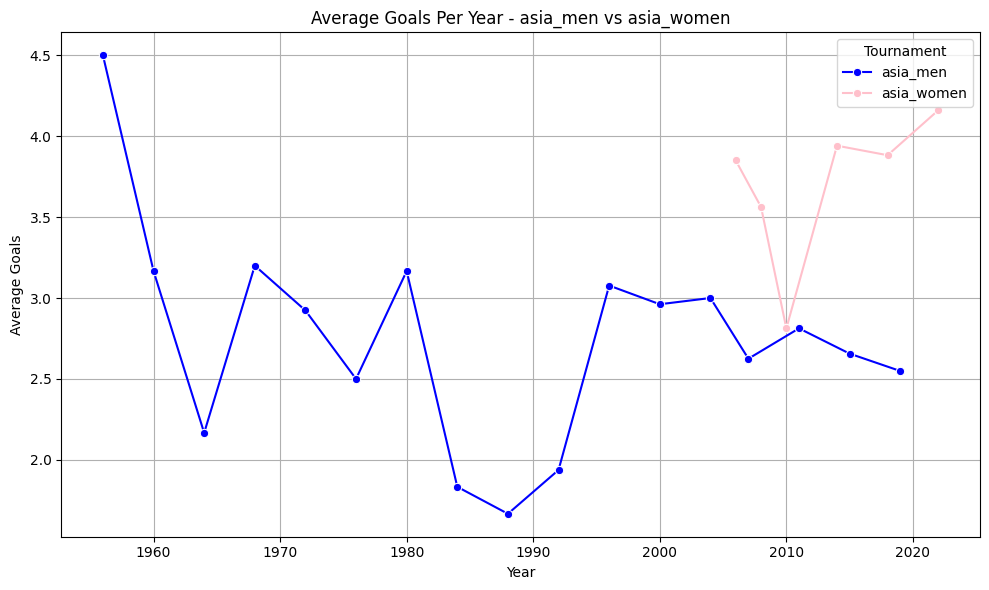

In [ ]:
# Loop through each pair of men's and women's tournaments
for (men_key, women_key), (result, is_significant) in results.items():
    men_data = tournaments[men_key]
    women_data = tournaments[women_key]

    # Additional Line Plot: Average Goals Per Year for Men vs Women
    # Convert date column to datetime format
    men_data['date'] = pd.to_datetime(men_data['date'])
    women_data['date'] = pd.to_datetime(women_data['date'])

    # Extract the year from the date column
    men_data['year'] = men_data['date'].dt.year
    women_data['year'] = women_data['date'].dt.year

    # Group by year and calculate average total goals per year
    avg_goals_men = men_data.groupby('year')['total_goals'].mean().reset_index()
    avg_goals_women = women_data.groupby('year')['total_goals'].mean().reset_index()

    # Plot the line plot
    plt.figure(figsize=(10, 6))

    sns.lineplot(x='year', y='total_goals', data=avg_goals_men, label=f'{men_key}', marker='o', color='blue')
    sns.lineplot(x='year', y='total_goals', data=avg_goals_women, label=f'{women_key}', marker='o', color='pink')

    plt.title(f'Average Goals Per Year - {men_key} vs {women_key}')
    plt.xlabel('Year')
    plt.ylabel('Average Goals')
    plt.legend(title='Tournament')
    plt.grid(True)
    plt.savefig(f"Lineplot-{men_key} vs {women_key}.png")
    plt.tight_layout()

    plt.show()

In [ ]:
tournaments = {
    "wc_men": wc_men, "euros_men": euros_men, "copa_men": copa_men, "euro_qual_men": euro_qual_men, "asia_men": asia_men,
    "wc_women": wc_women, "euros_women": euros_women, "copa_women": copa_women, "euro_qual_women": euro_qual_women, "asia_women": asia_women
}

# FINDING THE MEDIANS(SINCE ALL GROUPS UNDERWENT MANN - WHITNEY U'S TEST)

In [ ]:
median_results = {}

for men_key, women_key in zip(
    ["wc_men", "euros_men", "copa_men", "euro_qual_men", "asia_men"],
    ["wc_women", "euros_women", "copa_women", "euro_qual_women", "asia_women"]
):
    # Extract men's and women's data
    men_data = tournaments[men_key]
    women_data = tournaments[women_key]

    # Calculate median for men's and women's tournaments
    men_median = np.median(men_data['total_goals'])
    women_median = np.median(women_data['total_goals'])

    # Store results
    median_results[(men_key, women_key)] = (men_median, women_median)

    # Print results
    print(f"Median Goals - {men_key} vs {women_key}:")
    print(f"{men_key}: {men_median}, {women_key}: {women_median}")
    print('-' * 50)

Median Goals - wc_men vs wc_women:
wc_men: 3.0, wc_women: 3.0
--------------------------------------------------
Median Goals - euros_men vs euros_women:
euros_men: 2.0, euros_women: 3.0
--------------------------------------------------
Median Goals - copa_men vs copa_women:
copa_men: 3.0, copa_women: 4.0
--------------------------------------------------
Median Goals - euro_qual_men vs euro_qual_women:
euro_qual_men: 3.0, euro_qual_women: 3.0
--------------------------------------------------
Median Goals - asia_men vs asia_women:
asia_men: 2.0, asia_women: 3.0
--------------------------------------------------


# PERFORMING BONFERRONI CORRECTION

The Bonferroni correction is a method used to adjust the significance level when performing multiple comparisons, to control the overall Type 1 error rate. Since we have 5 tournaments, our probability for a Type I error increases 5 times over. So we need the correction test

In [ ]:
# Define the adjusted alpha level after Bonferroni correction
adjusted_alpha = 0.05 / 5
print(f"Adjusted alpha level after Bonferroni correction: {adjusted_alpha:.4f}")

# P-values associated with each tournament pair
p_values = {
    "wc_men vs wc_women": 0.003,
    "euros_men vs euros_women": 0.110,
    "copa_men vs copa_women": 0.000,
    "euro_qual_men vs euro_qual_women": 0.000,
    "asia_men vs asia_women": 0.000
}

# Apply Bonferroni correction and determine significance
for comparison, p_value in p_values.items():
    is_significant = p_value < adjusted_alpha
    significance_status = "Reject the Null Hypothesis" if is_significant else "Fail to Reject the Null Hypothesis"
    print(f"{comparison} Results with Bonferroni correction:")
    print(f"Original p-value: {p_value:.4f}")
    print(f"Statistical Significance: {significance_status}")
    print('-' * 50)


Adjusted alpha level after Bonferroni correction: 0.0100
wc_men vs wc_women Results with Bonferroni correction:
Original p-value: 0.0030
Statistical Significance: Reject the Null Hypothesis
--------------------------------------------------
euros_men vs euros_women Results with Bonferroni correction:
Original p-value: 0.1100
Statistical Significance: Fail to Reject the Null Hypothesis
--------------------------------------------------
copa_men vs copa_women Results with Bonferroni correction:
Original p-value: 0.0000
Statistical Significance: Reject the Null Hypothesis
--------------------------------------------------
euro_qual_men vs euro_qual_women Results with Bonferroni correction:
Original p-value: 0.0000
Statistical Significance: Reject the Null Hypothesis
--------------------------------------------------
asia_men vs asia_women Results with Bonferroni correction:
Original p-value: 0.0000
Statistical Significance: Reject the Null Hypothesis
--------------------------------------

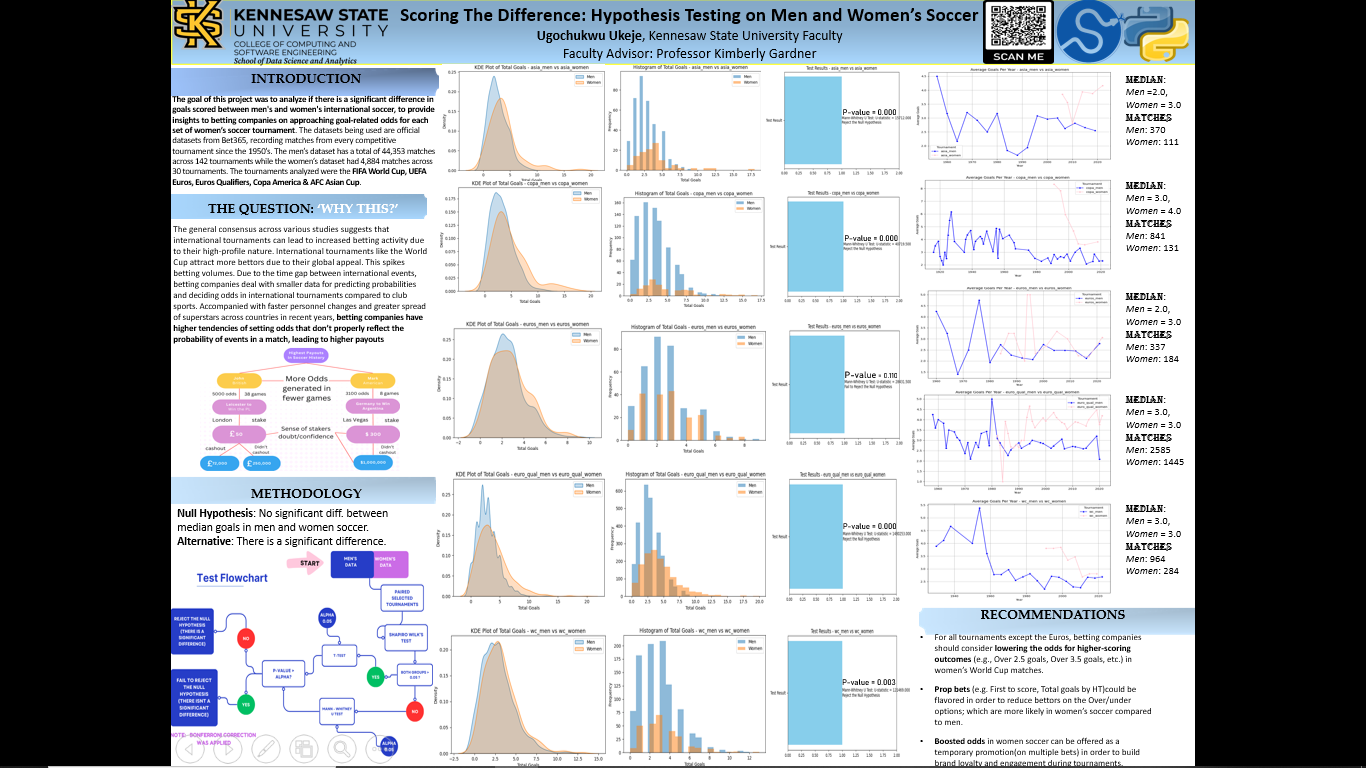